In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("all_log_1e4_fit_angular_dirc_withsupport.csv", delim_whitespace=True)
df_tpc = pd.read_csv("all_log_1e4_fit_angular_dirc.csv", delim_whitespace=True)
#df_tpc = df_tpc[(df_tpc['detector']=="TPC")]
# the numbers in this file are obtained by using gaussian fit

In [3]:
df.head(5)

,detector,nhit,eta,pt,phi_res,phi_resE,theta_res,theta_resE,pt_res,pt_resE,p_res,p_resE
0,MM_6_3x2_2D,1,0.931632,1,0.001818,0.000015,0.001828,0.000015,0.008914,0.000075,0.008727,0.000075
1,MM_6_3x2_2D,2,0.931632,1,0.001842,0.000015,0.001810,0.000015,0.008982,0.000074,0.008741,0.000073
2,MM_6_3x2_2D,3,0.931632,1,0.001818,0.000015,0.001833,0.000015,0.008928,0.000077,0.008771,0.000076
3,MM_6_3x2_2D,5,0.931632,1,0.001873,0.000016,0.001831,0.000015,0.008841,0.000076,0.008574,0.000074
4,MM_6_3x2_2D,1,0.931632,2,0.001028,0.000008,0.000909,0.000008,0.009983,0.000081,0.009932,0.000081


In [4]:
df_tpc.head(5)

,detector,eta,pt,phi_res,phi_resE,theta_res,theta_resE,pt_res,pt_resE,p_res,p_resE
0,MM_6_3x2_1D,0.931632,1,0.004978,0.000055,0.004412,0.000038,0.026732,0.000352,0.025341,0.000360
1,MM_6_3x2_1D,0.931632,2,0.006074,0.000062,0.000717,0.000007,0.064453,0.000662,0.063645,0.000635
2,MM_6_3x2_1D,0.931632,3,0.006605,0.000060,0.000466,0.000004,0.102891,0.000970,0.102963,0.000977
3,MM_6_3x2_1D,0.931632,4,0.006662,0.000062,0.000358,0.000003,0.132936,0.001406,0.132486,0.001378
4,MM_6_3x2_1D,0.931632,5,0.006691,0.000062,0.000285,0.000003,0.164008,0.001877,0.162416,0.001882


In [5]:
def getdata_ang(df, det="MM_6_3x2_2D", eta=0, nhit=1):
    if det=="TPC":
        pt = np.array(df[(df['detector']==det) & (df['eta']==eta)]["pt"])
        phi_res = np.array(df[(df['detector']==det) & (df['eta']==eta)]["phi_res"])
        phi_resE = np.array(df[(df['detector']==det) & (df['eta']==eta)]["phi_resE"])
        theta_res = np.array(df[(df['detector']==det) & (df['eta']==eta)]["theta_res"])
        theta_resE = np.array(df[(df['detector']==det) & (df['eta']==eta)]["theta_resE"])
        pt_res = np.array(df[(df['detector']==det) & (df['eta']==eta)]["pt_res"])
        pt_resE = np.array(df[(df['detector']==det) & (df['eta']==eta)]["pt_resE"])
        p_res = np.array(df[(df['detector']==det) & (df['eta']==eta)]["p_res"])
        p_resE = np.array(df[(df['detector']==det) & (df['eta']==eta)]["p_resE"])
    else:
        pt = np.array(df[(df['detector']==det) & (df['eta']==eta) & (df['nhit']==nhit)]["pt"])
        phi_res = np.array(df[(df['detector']==det) & (df['eta']==eta) & (df['nhit']==nhit)]["phi_res"])
        phi_resE = np.array(df[(df['detector']==det) & (df['eta']==eta) & (df['nhit']==nhit)]["phi_resE"])
        theta_res = np.array(df[(df['detector']==det) & (df['eta']==eta) & (df['nhit']==nhit)]["theta_res"])
        theta_resE = np.array(df[(df['detector']==det) & (df['eta']==eta) & (df['nhit']==nhit)]["theta_resE"])
        pt_res = np.array(df[(df['detector']==det) & (df['eta']==eta) & (df['nhit']==nhit)]["pt_res"])
        pt_resE = np.array(df[(df['detector']==det) & (df['eta']==eta) & (df['nhit']==nhit)]["pt_resE"])
        p_res = np.array(df[(df['detector']==det) & (df['eta']==eta) & (df['nhit']==nhit)]["p_res"])
        p_resE = np.array(df[(df['detector']==det) & (df['eta']==eta) & (df['nhit']==nhit)]["p_resE"])
    return pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE

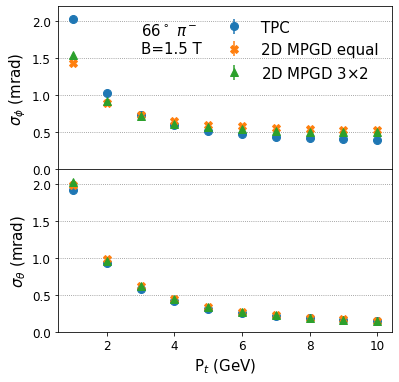

In [15]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6,6))
fig.subplots_adjust(hspace=0)
#for i in ["TPC", "MM_6_eq_2D", "MM_6_eq_1D", "MM_6_3x2_2D", "MM_6_3x2_1D"]:
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
data = {"TPC":df_tpc, "MM_6_eq_2D":df, "MM_6_3x2_2D":df}
for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, phi_res, phi_resE, theta_res, theta_resE, *_ = getdata_ang(data[i], i, 0.4316947267462241)
    ax[0].errorbar(pt[:10], phi_res[:10]*1e3, yerr=phi_resE[:10]*1e3, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
# for i in ["MM_6_eq_2D", "MM_6_3x2_2D"]:
#     pt, phi_res, phi_resE, theta_res, theta_resE, *_ = getdata_ang(data[i], i, 0.4316947267462241,5)
#     ax[0].errorbar(pt[:10], phi_res[:10]*1e3, yerr=phi_resE[:10]*1e3, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
ax[0].legend(fontsize=15, frameon=False)
#     ax[0].set_xlabel("P$_t$ (GeV)", fontsize=15)
ax[0].set_ylabel("$\sigma_{\phi}$ (mrad)", fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=12)

ax[0].yaxis.set_ticks([0,0.5,1,1.5,2.,2.5])
ax[0].set_ylim([0,2.2])

ax[0].text(0.25, 0.8, '66$^\circ$ $\pi^-$\nB=1.5 T', horizontalalignment='left',
verticalalignment='center', transform=ax[0].transAxes, fontsize=15)
ax[0].grid(True, axis="y",linestyle=":", color="gray")

for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, phi_res, phi_resE, theta_res, theta_resE, *_ = getdata_ang(data[i], i, 0.4316947267462241)
    ax[1].errorbar(pt[:10], theta_res[:10]*1e3, yerr=theta_resE[:10]*1e3, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
    #ax1.legend(fontsize=15, frameon=False)
# for i in ["MM_6_eq_2D", "MM_6_3x2_2D"]:
#     pt, phi_res, phi_resE, theta_res, theta_resE, *_ = getdata_ang(data[i], i, 0.4316947267462241,5)
#     ax[0].errorbar(pt[:10], phi_res[:10]*1e3, yerr=phi_resE[:10]*1e3, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
ax[1].set_xlabel("P$_t$ (GeV)", fontsize=15)
ax[1].set_ylabel(r"$\sigma_{\theta}$ (mrad)", fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=12)

ax[1].yaxis.set_ticks([0,0.5,1,1.5,2,2.5])
ax[1].set_ylim([0,2.2])
#ax.text(0.1, 0.5, '$\eta$=0\nB=1.5 T', horizontalalignment='left',
#verticalalignment='center', transform=ax.transAxes, fontsize=15)
ax[1].grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("angular_resolution_pt_deg66_dirc_10GeV_withsupport.pdf", transparent=True, bbox_inches='tight')
fig.savefig("angular_resolution_pt_deg66_dirc_10GeV_withsupport.png", transparent=True, bbox_inches='tight', dpi=600)

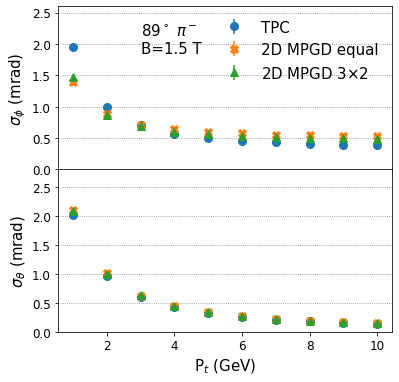

In [7]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6,6))
fig.subplots_adjust(hspace=0)
#for i in ["TPC", "MM_6_eq_2D", "MM_6_eq_1D", "MM_6_3x2_2D", "MM_6_3x2_1D"]:
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, phi_res, phi_resE, theta_res, theta_resE, *_ = getdata_ang(data[i], i, 0.01745417868358519)
    ax[0].errorbar(pt[:10], phi_res[:10]*1e3, yerr=phi_resE[:10]*1e3, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
ax[0].legend(fontsize=15, frameon=False)
#     ax[0].set_xlabel("P$_t$ (GeV)", fontsize=15)
ax[0].set_ylabel("$\sigma_{\phi}$ (mrad)", fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=12)

ax[0].yaxis.set_ticks([0,0.5,1,1.5,2.,2.5])
ax[0].set_ylim([0,2.6])

ax[0].text(0.25, 0.8, '89$^\circ$ $\pi^-$\nB=1.5 T', horizontalalignment='left',
verticalalignment='center', transform=ax[0].transAxes, fontsize=15)
ax[0].grid(True, axis="y",linestyle=":", color="gray")

for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, phi_res, phi_resE, theta_res, theta_resE, *_ = getdata_ang(data[i], i, 0.01745417868358519)
    ax[1].errorbar(pt[:10], theta_res[:10]*1e3, yerr=theta_resE[:10]*1e3, linestyle='None', marker=markers[i], label=labels[i], markersize=8)
    #ax1.legend(fontsize=15, frameon=False)
ax[1].set_xlabel("P$_t$ (GeV)", fontsize=15)
ax[1].set_ylabel(r"$\sigma_{\theta}$ (mrad)", fontsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=12)

ax[1].yaxis.set_ticks([0,0.5,1,1.5,2,2.5])
ax[1].set_ylim([0,2.8])
#ax.text(0.1, 0.5, '$\eta$=0\nB=1.5 T', horizontalalignment='left',
#verticalalignment='center', transform=ax.transAxes, fontsize=15)
ax[1].grid(True, axis="y",linestyle=":", color="gray")
# fig.savefig("angular_resolution_pt_deg89_dirc_10GeV.pdf", transparent=True, bbox_inches='tight')
# fig.savefig("angular_resolution_pt_deg89_dirc_10GeV.png", transparent=True, bbox_inches='tight', dpi=600)

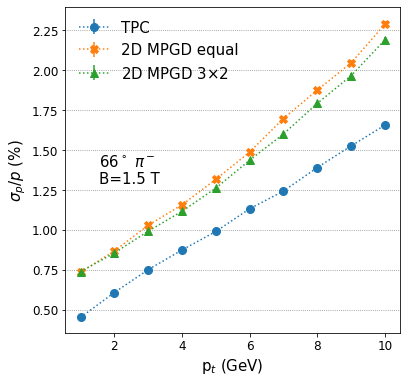

In [14]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
for i in ["TPC", "MM_6_eq_2D", "MM_6_3x2_2D"]:
    pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(data[i], i,0.4316947267462241,1)
    ax.errorbar(pt[:10], p_res[:10]*100, yerr=p_resE[:10]*100, linestyle=':', marker=markers[i], label=labels[i], markersize=8)
# for i in ["MM_6_eq_2D", "MM_6_3x2_2D"]:
#     pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(data[i], i,0.4316947267462241,5)
#     ax.errorbar(pt[:10], p_res[:10]*100, yerr=p_resE[:10]*100, linestyle=':', marker=markers[i], label=labels[i], markersize=8)
ax.legend(fontsize=15, frameon=False)
ax.set_xlabel("p$_t$ (GeV)", fontsize=15)
ax.set_ylabel("$\sigma_{p}/p$ (%)", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
    
    #ax.yaxis.set_ticks(np.arange(0, 13, 2))
    #ax.set_ylim([0,12])
ax.text(0.1, 0.5, '66$^\circ$ $\pi^-$\nB=1.5 T', horizontalalignment='left',
verticalalignment='center', transform=ax.transAxes, fontsize=15)
ax.grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("momentum_resolution_p_deg66_dirc_10GeV_withsupport.pdf", transparent=True, bbox_inches='tight')
fig.savefig("momentum_resolution_p_deg66_dirc_10GeV_withsupport.png", transparent=True, bbox_inches='tight', dpi=600)

In [9]:
def diverror(c0,c1,e0,e1):
    return (c0*c0*e1*e1+c1*c1*e0*e0)/c1**4

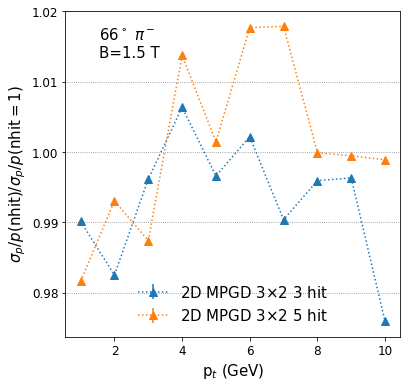

In [16]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
# i="TPC"
pt_o, phi_res_o, phi_resE_o, theta_res_o, theta_resE_o, pt_res_o, pt_resE_o, p_res_o, p_resE_o = getdata_ang(df, "MM_6_3x2_2D", 0.4316947267462241, 1)
# ax.errorbar(pt[:10], p_res[:10]*100, yerr=p_resE[:10]*100, linestyle=':', marker=markers[i], label=labels[i], markersize=8)
for i in ["MM_6_3x2_2D"]:#, "MM_6_3x2_2D"]:
    for nhit in [3,5]:
        pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(data[i], i,0.4316947267462241,nhit)
        ax.errorbar(pt[:10], p_res[:10]*100/p_res_o[:10]/100, yerr=diverror(p_res[:10], p_res_o[:10], p_resE[:10], p_resE_o[:10]), linestyle=':', marker=markers[i], label=labels[i]+" "+str(nhit)+" hit", markersize=8)
# for i in ["MM_6_eq_2D", "MM_6_3x2_2D"]:
#     pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(data[i], i,0.4316947267462241,5)
#     ax.errorbar(pt[:10], p_res[:10]*100, yerr=p_resE[:10]*100, linestyle=':', marker=markers[i], label=labels[i], markersize=8)
ax.legend(fontsize=15, frameon=False, loc=8)
ax.set_xlabel("p$_t$ (GeV)", fontsize=15)
#ax.set_ylabel("$\sigma_{p}/p$ (%)", fontsize=15)
ax.set_ylabel("$\sigma_{p}/p($nhit$)$/$\sigma_{p}/p($nhit$=1)$", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
    
    #ax.yaxis.set_ticks(np.arange(0, 13, 2))
    # ax.set_ylim([0.99,1.01])
ax.text(0.1, 0.9, '66$^\circ$ $\pi^-$\nB=1.5 T', horizontalalignment='left',
verticalalignment='center', transform=ax.transAxes, fontsize=15)
ax.grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("momentum_resolution_p_deg66_dirc_10GeV_withsupport_comp.pdf", transparent=True, bbox_inches='tight')
fig.savefig("momentum_resolution_p_deg66_dirc_10GeV_withsupport_comp.png", transparent=True, bbox_inches='tight', dpi=600)

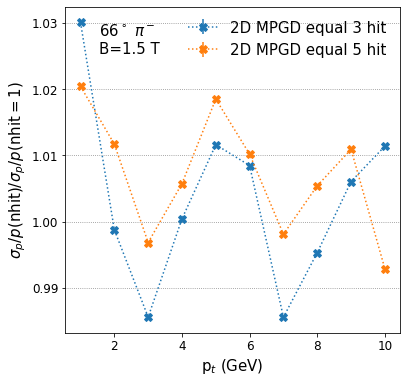

In [17]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
# i="TPC"
pt_o, phi_res_o, phi_resE_o, theta_res_o, theta_resE_o, pt_res_o, pt_resE_o, p_res_o, p_resE_o = getdata_ang(df, "MM_6_eq_2D", 0.4316947267462241, 1)
# ax.errorbar(pt[:10], p_res[:10]*100, yerr=p_resE[:10]*100, linestyle=':', marker=markers[i], label=labels[i], markersize=8)
for i in ["MM_6_eq_2D"]:#, "MM_6_3x2_2D"]:
    for nhit in [3,5]:
        pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(data[i], i,0.4316947267462241,nhit)
        ax.errorbar(pt[:10], p_res[:10]*100/p_res_o[:10]/100, yerr=diverror(p_res[:10], p_res_o[:10], p_resE[:10], p_resE_o[:10]), linestyle=':', marker=markers[i], label=labels[i]+" "+str(nhit)+" hit", markersize=8)
# for i in ["MM_6_eq_2D", "MM_6_3x2_2D"]:
#     pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(data[i], i,0.4316947267462241,5)
#     ax.errorbar(pt[:10], p_res[:10]*100, yerr=p_resE[:10]*100, linestyle=':', marker=markers[i], label=labels[i], markersize=8)
ax.legend(fontsize=15, frameon=False)
ax.set_xlabel("p$_t$ (GeV)", fontsize=15)
ax.set_ylabel("$\sigma_{p}/p($nhit$)$/$\sigma_{p}/p($nhit$=1)$", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
    
    #ax.yaxis.set_ticks(np.arange(0, 13, 2))
    # ax.set_ylim([0.99,1.01])
ax.text(0.1, 0.9, '66$^\circ$ $\pi^-$\nB=1.5 T', horizontalalignment='left',
verticalalignment='center', transform=ax.transAxes, fontsize=15)
ax.grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("momentum_resolution_p_eq_deg66_dirc_10GeV_withsupport_comp.pdf", transparent=True, bbox_inches='tight')
fig.savefig("momentum_resolution_p_eq_deg66_dirc_10GeV_withsupport_comp.png", transparent=True, bbox_inches='tight', dpi=600)

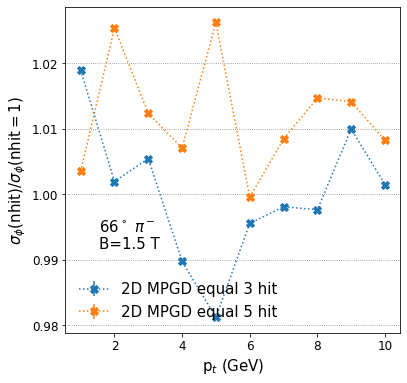

In [18]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
# i="TPC"
pt_o, phi_res_o, phi_resE_o, theta_res_o, theta_resE_o, pt_res_o, pt_resE_o, p_res_o, p_resE_o = getdata_ang(df, "MM_6_eq_2D", 0.4316947267462241, 1)
# ax.errorbar(pt[:10], p_res[:10]*100, yerr=p_resE[:10]*100, linestyle=':', marker=markers[i], label=labels[i], markersize=8)
for i in ["MM_6_eq_2D"]:#, "MM_6_3x2_2D"]:
    for nhit in [3,5]:
        pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(data[i], i,0.4316947267462241,nhit)
        ax.errorbar(pt[:10], phi_res[:10]*100/phi_res_o[:10]/100, yerr=diverror(phi_res[:10], phi_res_o[:10], phi_resE[:10], phi_resE_o[:10]), linestyle=':', marker=markers[i], label=labels[i]+" "+str(nhit)+" hit", markersize=8)
# for i in ["MM_6_eq_2D", "MM_6_3x2_2D"]:
#     pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(data[i], i,0.4316947267462241,5)
#     ax.errorbar(pt[:10], p_res[:10]*100, yerr=p_resE[:10]*100, linestyle=':', marker=markers[i], label=labels[i], markersize=8)
ax.legend(fontsize=15, frameon=False, loc='lower left')
ax.set_xlabel("p$_t$ (GeV)", fontsize=15)
ax.set_ylabel("$\sigma_{\phi}($nhit$)$/$\sigma_{\phi}($nhit$=1)$", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
    
    #ax.yaxis.set_ticks(np.arange(0, 13, 2))
    # ax.set_ylim([0.99,1.01])
ax.text(0.1, 0.3, '66$^\circ$ $\pi^-$\nB=1.5 T', horizontalalignment='left',
verticalalignment='center', transform=ax.transAxes, fontsize=15)
ax.grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("phi_resolution_p_eq_deg66_dirc_10GeV_withsupport_comp.pdf", transparent=True, bbox_inches='tight')
fig.savefig("phi_resolution_p_eq_deg66_dirc_10GeV_withsupport_comp.png", transparent=True, bbox_inches='tight', dpi=600)

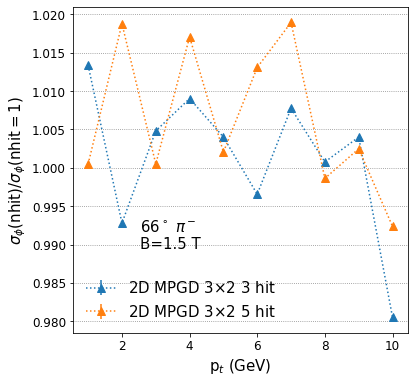

In [19]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
# i="TPC"
pt_o, phi_res_o, phi_resE_o, theta_res_o, theta_resE_o, pt_res_o, pt_resE_o, p_res_o, p_resE_o = getdata_ang(df, "MM_6_3x2_2D", 0.4316947267462241, 1)
# ax.errorbar(pt[:10], p_res[:10]*100, yerr=p_resE[:10]*100, linestyle=':', marker=markers[i], label=labels[i], markersize=8)
for i in ["MM_6_3x2_2D"]:#, "MM_6_3x2_2D"]:
    for nhit in [3,5]:
        pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(data[i], i,0.4316947267462241,nhit)
        ax.errorbar(pt[:10], phi_res[:10]*100/phi_res_o[:10]/100, yerr=diverror(phi_res[:10], phi_res_o[:10], phi_resE[:10], phi_resE_o[:10]), linestyle=':', marker=markers[i], label=labels[i]+" "+str(nhit)+" hit", markersize=8)
# for i in ["MM_6_eq_2D", "MM_6_3x2_2D"]:
#     pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(data[i], i,0.4316947267462241,5)
#     ax.errorbar(pt[:10], p_res[:10]*100, yerr=p_resE[:10]*100, linestyle=':', marker=markers[i], label=labels[i], markersize=8)
ax.legend(fontsize=15, frameon=False, loc='lower left')
ax.set_xlabel("p$_t$ (GeV)", fontsize=15)
ax.set_ylabel("$\sigma_{\phi}($nhit$)$/$\sigma_{\phi}($nhit$=1)$", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
    
    #ax.yaxis.set_ticks(np.arange(0, 13, 2))
    # ax.set_ylim([0.99,1.01])
ax.text(0.2, 0.3, '66$^\circ$ $\pi^-$\nB=1.5 T', horizontalalignment='left',
verticalalignment='center', transform=ax.transAxes, fontsize=15)
ax.grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("phi_resolution_p_deg66_dirc_10GeV_withsupport_comp.pdf", transparent=True, bbox_inches='tight')
fig.savefig("phi_resolution_p_deg66_dirc_10GeV_withsupport_comp.png", transparent=True, bbox_inches='tight', dpi=600)

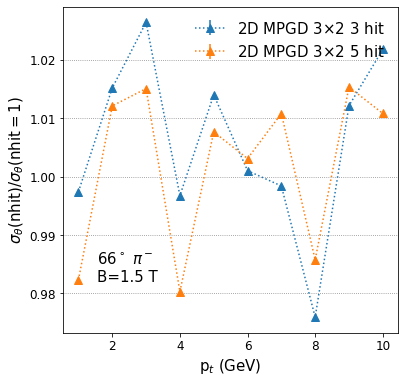

In [24]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
# i="TPC"
pt_o, phi_res_o, phi_resE_o, theta_res_o, theta_resE_o, pt_res_o, pt_resE_o, p_res_o, p_resE_o = getdata_ang(df, "MM_6_3x2_2D", 0.4316947267462241, 1)
# ax.errorbar(pt[:10], p_res[:10]*100, yerr=p_resE[:10]*100, linestyle=':', marker=markers[i], label=labels[i], markersize=8)
for i in ["MM_6_3x2_2D"]:#, "MM_6_3x2_2D"]:
    for nhit in [3,5]:
        pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(data[i], i,0.4316947267462241,nhit)
        ax.errorbar(pt[:10], theta_res[:10]/theta_res_o[:10], yerr=diverror(theta_res[:10], theta_res_o[:10], theta_resE[:10], theta_resE_o[:10]), linestyle=':', marker=markers[i], label=labels[i]+" "+str(nhit)+" hit", markersize=8)
# for i in ["MM_6_eq_2D", "MM_6_3x2_2D"]:
#     pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(data[i], i,0.4316947267462241,5)
#     ax.errorbar(pt[:10], p_res[:10]*100, yerr=p_resE[:10]*100, linestyle=':', marker=markers[i], label=labels[i], markersize=8)
ax.legend(fontsize=15, frameon=False, loc='upper right')
ax.set_xlabel("p$_t$ (GeV)", fontsize=15)
ax.set_ylabel("$\sigma_{\\theta}($nhit$)$/$\sigma_{\\theta}($nhit$=1)$", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
    
    #ax.yaxis.set_ticks(np.arange(0, 13, 2))
    # ax.set_ylim([0.99,1.01])
ax.text(0.1, 0.2, '66$^\circ$ $\pi^-$\nB=1.5 T', horizontalalignment='left',
verticalalignment='center', transform=ax.transAxes, fontsize=15)
ax.grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("theta_resolution_p_deg66_dirc_10GeV_withsupport_comp.pdf", transparent=True, bbox_inches='tight')
fig.savefig("theta_resolution_p_deg66_dirc_10GeV_withsupport_comp.png", transparent=True, bbox_inches='tight', dpi=600)

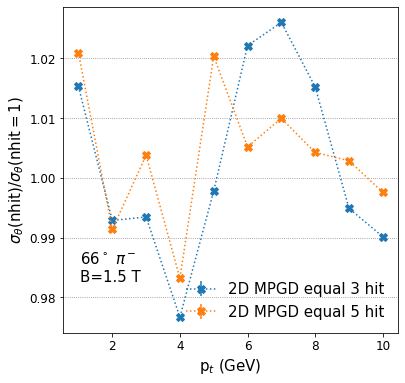

In [27]:
fig= plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
labels={"TPC": "TPC", "MM_6_eq_2D": "2D MPGD equal", "MM_6_3x2_2D": r"2D MPGD 3$\times$2"}
markers={"TPC": "o", "MM_6_eq_2D": "X", "MM_6_3x2_2D": "^"}
# i="TPC"
pt_o, phi_res_o, phi_resE_o, theta_res_o, theta_resE_o, pt_res_o, pt_resE_o, p_res_o, p_resE_o = getdata_ang(df, "MM_6_eq_2D", 0.4316947267462241, 1)
# ax.errorbar(pt[:10], p_res[:10]*100, yerr=p_resE[:10]*100, linestyle=':', marker=markers[i], label=labels[i], markersize=8)
for i in ["MM_6_eq_2D"]:#, "MM_6_3x2_2D"]:
    for nhit in [3,5]:
        pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(data[i], i,0.4316947267462241,nhit)
        ax.errorbar(pt[:10], theta_res[:10]/theta_res_o[:10], yerr=diverror(theta_res[:10], theta_res_o[:10], theta_resE[:10], theta_resE_o[:10]), linestyle=':', marker=markers[i], label=labels[i]+" "+str(nhit)+" hit", markersize=8)
# for i in ["MM_6_eq_2D", "MM_6_3x2_2D"]:
#     pt, phi_res, phi_resE, theta_res, theta_resE, pt_res, pt_resE, p_res, p_resE = getdata_ang(data[i], i,0.4316947267462241,5)
#     ax.errorbar(pt[:10], p_res[:10]*100, yerr=p_resE[:10]*100, linestyle=':', marker=markers[i], label=labels[i], markersize=8)
ax.legend(fontsize=15, frameon=False, loc='lower right')
ax.set_xlabel("p$_t$ (GeV)", fontsize=15)
ax.set_ylabel("$\sigma_{\\theta}($nhit$)$/$\sigma_{\\theta}($nhit$=1)$", fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
    
    #ax.yaxis.set_ticks(np.arange(0, 13, 2))
    # ax.set_ylim([0.99,1.01])
ax.text(0.05, 0.2, '66$^\circ$ $\pi^-$\nB=1.5 T', horizontalalignment='left',
verticalalignment='center', transform=ax.transAxes, fontsize=15)
ax.grid(True, axis="y",linestyle=":", color="gray")
fig.savefig("theta_resolution_p_eq_deg66_dirc_10GeV_withsupport_comp.pdf", transparent=True, bbox_inches='tight')
fig.savefig("theta_resolution_p_eq_deg66_dirc_10GeV_withsupport_comp.png", transparent=True, bbox_inches='tight', dpi=600)